In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from dnn_app_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a b'car' picture.


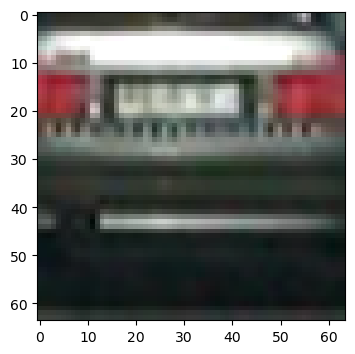

In [27]:
# Example of a picture
index = 88

plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + str(classes[train_y[0,index]]) +  " picture.")

In [28]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 296
Number of testing examples: 75
Each image is of size: (64, 64, 3)
train_x_orig shape: (296, 64, 64, 3)
train_y shape: (1, 296)
test_x_orig shape: (75, 64, 64, 3)
test_y shape: (1, 75)


In [29]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 296)
test_x's shape: (12288, 75)


In [30]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 15
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [33]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost =  compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6935434157714255
Cost after iteration 100: 0.6826787895672374
Cost after iteration 200: 0.6308759973459422
Cost after iteration 300: 0.5439611508802786
Cost after iteration 400: 0.48691520146393863
Cost after iteration 500: 0.43760786112050487
Cost after iteration 600: 0.3898587645198752
Cost after iteration 700: 0.3438419145183738
Cost after iteration 800: 0.2996385407130717
Cost after iteration 900: 0.25831786999570033
Cost after iteration 1000: 0.2216657947588603
Cost after iteration 1100: 0.19023496675423027
Cost after iteration 1200: 0.16387962103393997
Cost after iteration 1300: 0.14191558101014373
Cost after iteration 1400: 0.1235402022486994
Cost after iteration 1500: 0.10827896311753679
Cost after iteration 1600: 0.09549912653475648
Cost after iteration 1700: 0.08472958519955413
Cost after iteration 1800: 0.07562365471291814
Cost after iteration 1900: 0.06788618960172428
Cost after iteration 2000: 0.06127999753997231
Cost after iteration 2100: 0.05560

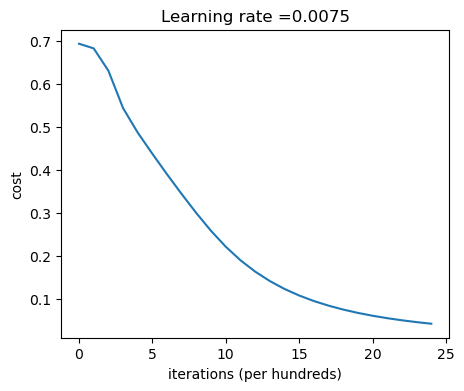

In [34]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), learning_rate=0.0075, num_iterations = 2500, print_cost=True)

In [35]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [36]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.7066666666666667


In [37]:
### CONSTANTS ###
layers_dims = [12288, 30, 10, 7, 1] #  4-layer model

In [45]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
         AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
         cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
         grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
         parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
         if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
         if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.695708
Cost after iteration 100: 0.678635
Cost after iteration 200: 0.644848
Cost after iteration 300: 0.559802
Cost after iteration 400: 0.467612
Cost after iteration 500: 0.388471
Cost after iteration 600: 0.375148
Cost after iteration 700: 0.334402
Cost after iteration 800: 0.292877
Cost after iteration 900: 0.157894
Cost after iteration 1000: 0.133363
Cost after iteration 1100: 0.096456
Cost after iteration 1200: 0.065628
Cost after iteration 1300: 0.044724
Cost after iteration 1400: 0.032975
Cost after iteration 1500: 0.025295
Cost after iteration 1600: 0.019949
Cost after iteration 1700: 0.016182
Cost after iteration 1800: 0.013429
Cost after iteration 1900: 0.011349
Cost after iteration 2000: 0.009746
Cost after iteration 2100: 0.008481
Cost after iteration 2200: 0.007464
Cost after iteration 2300: 0.006631
Cost after iteration 2400: 0.005942


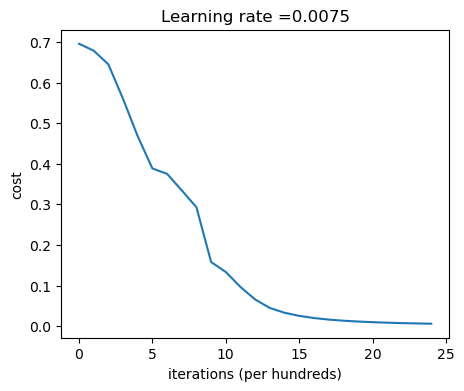

In [46]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [47]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [48]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.7466666666666667


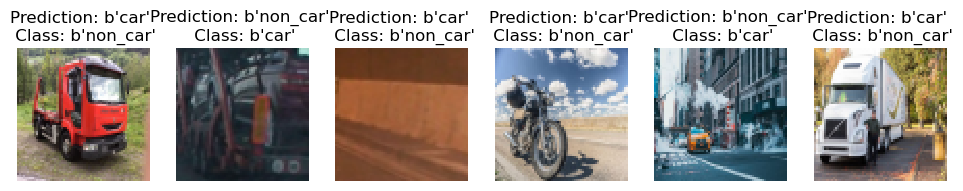

In [49]:
print_mislabeled_images(classes, test_x, test_y, pred_test)